### **Feature Extraction using PCA (Principal Component Analysis)**

In [1]:
import numpy as np    #Creating the dataset
import pandas as pd

np.random.seed(23)

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

data = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
data['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

data1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

data1['target'] = 0

data = data.append(data1,ignore_index=True)

data = data.sample(40)

<ipython-input-1-36652e2be31d>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(data1,ignore_index=True)


In [2]:
data.sample(6)

,feature1,feature2,feature3,target
25,0.290746,0.866975,0.982643,0
38,-0.764314,1.566504,1.548788,0
24,0.748855,2.593111,1.170818,0
15,-0.045438,1.040886,-0.094035,1
13,-0.022539,0.013422,0.935945,1
7,1.045371,0.538162,0.812119,1


In [5]:
import plotly.express as px #For 3d plotting
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(data, x=data['feature1'], y=data['feature2'], z=data['feature3'],
              color=data['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

#### **1. Applying Standard Scaling**

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data.iloc[:,0:3] = scaler.fit_transform(data.iloc[:,0:3])

#### **2. Finding Covariance Matrix**

In [7]:
covariance_matrix = np.cov([data.iloc[:,0],data.iloc[:,1],data.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)


Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


#### **3. Finding Eigen Values & Eigen Vectors**

In [8]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [9]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [10]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

In [13]:
!pip install mpl_toolkits.mplot3d

ERROR: Could not find a version that satisfies the requirement mpl_toolkits.mplot3d (from versions: none)
ERROR: No matching distribution found for mpl_toolkits.mplot3d


Populating the interactive namespace from numpy and matplotlib


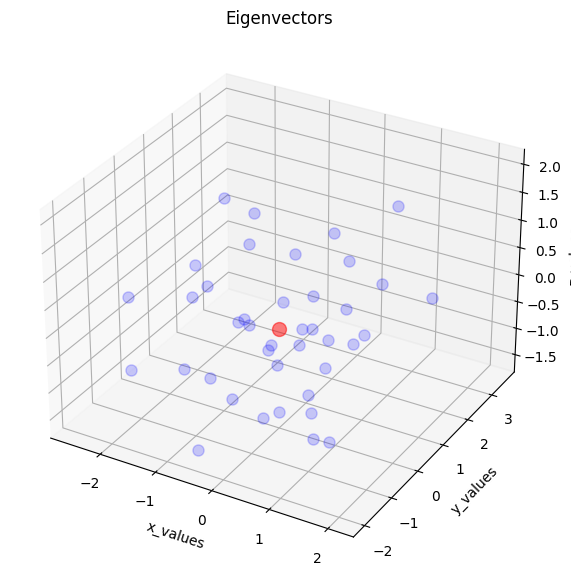

In [19]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(data['feature1'], data['feature2'], data['feature3'], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot([data['feature1'].mean()], [data['feature2'].mean()], [data['feature3'].mean()], 'o', markersize=10, color='red', alpha=0.5)
# for v in eigen_vectors.T:
#     a = Arrow3D([df['feature1'].mean(), v[0]], [df['feature2'].mean(), v[1]], [df['feature3'].mean(), v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
#     ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [22]:
pc = eigen_vectors[0:2] #Here pc refers to principle component
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [23]:
transformed_data = np.dot(data.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_data = pd.DataFrame(transformed_data,columns=['PC1','PC2'])
new_data['target'] = data['target'].values
new_data.head()

,PC1,PC2,target
0,0.599433,1.795862,1
1,1.056919,-0.212737,0
2,-0.271876,0.498222,1
3,-0.621586,0.023110,1
4,1.567286,1.730967,1


In [24]:
new_data['target'] = new_data['target'].astype('str')  #Pllotting the optimal plane in 2d
fig = px.scatter(x=new_data['PC1'],
                 y=new_data['PC2'],
                 color=new_data['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()
